In [7]:
import torch
import numpy as np
from torch import nn
import random
import torch.nn.functional as F
import collections
from torch.optim.lr_scheduler import StepLR
from CommunicationP3DX import CommunicationP3DX
from Agent import AgentClass
from std_srvs.srv import Empty
import rospy
import time
import shelve
import os
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

workspace = shelve.open('wsh_20231001_161909.out')
# true if the key exists
vars = list(workspace.keys())
print(workspace)
print(vars)

['hist_dict', 'checkpoint_inter', 'laser_scan_state_type_atual', 'path', 'theta_atual']


In [9]:
hist_dict = workspace['hist_dict']

def get_rewards_df(hist_dict,method):
    rewards = []
    episodes = []
    for key in hist_dict['rewards'].keys():
        episodes.append(key)
        rewards.append(hist_dict['rewards'][key][0])
    return pd.DataFrame({'Episodes':episodes, 'Rewards'+method:rewards})

def get_distances_df(hist_dict, method):
    distances = []
    episodes = []
    for key in hist_dict['rewards'].keys():
        episodes.append(key)
        distances.append(hist_dict['rewards'][key][1])
    return pd.DataFrame({'Episodes':episodes, 'Distances'+method:distances})

# 0 for crash, 1 for goal 2 for time
def get_success_df(hist_dict,method):
    success = []
    episodes = []
    for key in hist_dict['epresult'].keys():
        episodes.append(key)
        success.append(hist_dict['epresult'][key][1])
    df = pd.DataFrame({'Episodes':episodes, 'Success'+method:success})
    df['Success'+method] = np.where(df['Success'+method]==1,1,0)
    return df

def get_collision_df(hist_dict,method):
    collision = []
    episodes = []
    for key in hist_dict['epresult'].keys():
        episodes.append(key)
        collision.append(hist_dict['epresult'][key][1])
    df = pd.DataFrame({'Episodes':episodes, 'Colission'+method:collision})
    df['Colission'+method] = np.where(df['Colission'+method]==0,1,0)
    return df

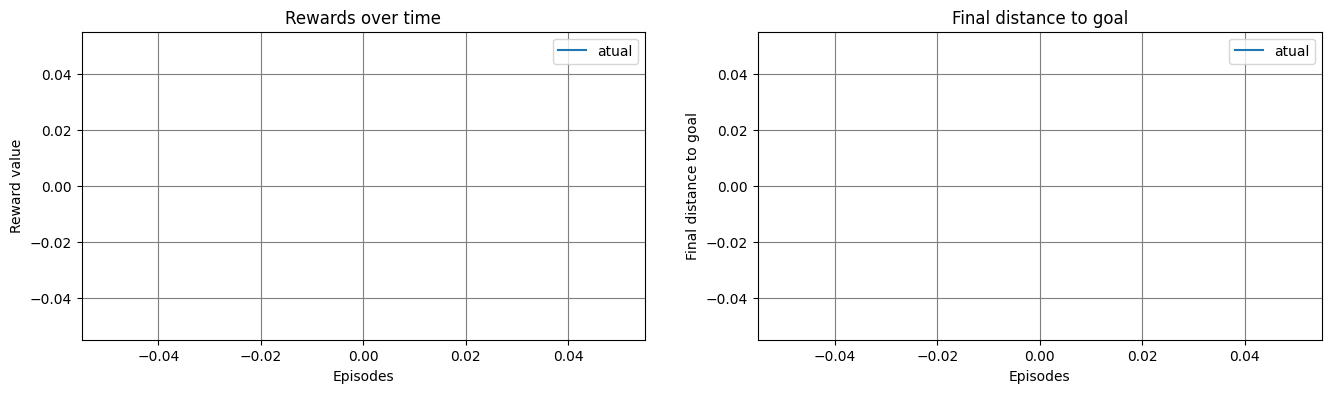

In [10]:
distances_df = get_distances_df(hist_dict, method='')
rewards_df = get_rewards_df(hist_dict, method='')

method = 'atual'
plt.figure(figsize=(16,4));
plt.subplot(121);

sns.lineplot(rewards_df.rolling(5).mean(),x = 'Episodes', y='Rewards', label=method);
sns.scatterplot(rewards_df,x = 'Episodes', y='Rewards', label=method, alpha = 0.3);

plt.legend()
plt.title('Rewards over time');
plt.ylabel('Reward value')
plt.grid(True, c='tab:gray')

plt.subplot(122);

sns.lineplot(distances_df.rolling(5).mean(),x = 'Episodes', y='Distances', label=method);
sns.scatterplot(distances_df,x = 'Episodes', y='Distances', label=method, alpha = 0.3);

plt.legend()
plt.title('Final distance to goal');
plt.ylabel('Final distance to goal')
plt.grid(True, c='tab:gray')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


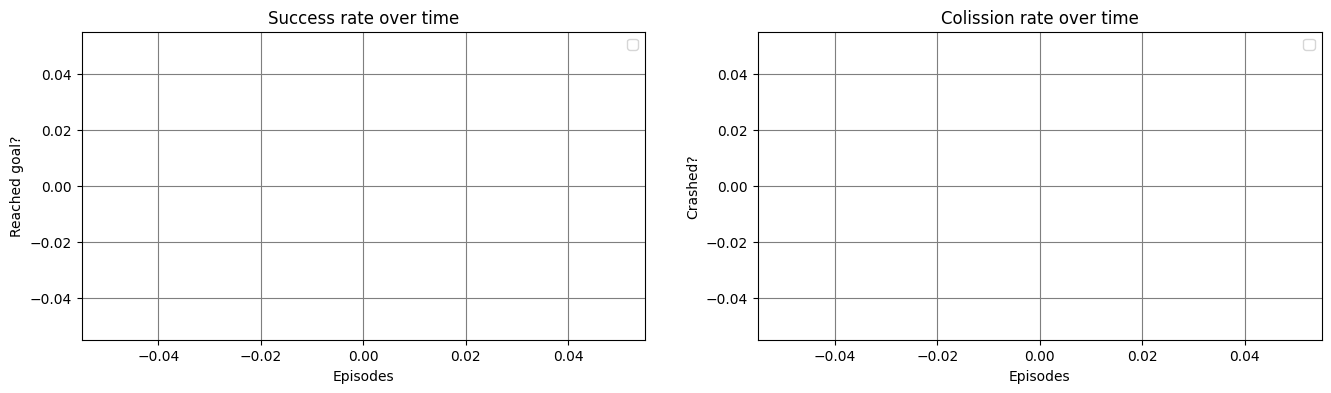

In [16]:
success_df = get_success_df(hist_dict,'')
collision_df = get_collision_df(hist_dict,'')

method = 'atual'
plt.figure(figsize=(16,4));
plt.subplot(121);
sns.lineplot(success_df.rolling(5).mean(),x = 'Episodes', y='Success');


plt.legend()
plt.title('Success rate over time');
plt.ylabel('Reached goal?')
plt.grid(True, c='tab:gray')

plt.subplot(122);
sns.lineplot(collision_df.rolling(5).mean(),x = 'Episodes', y='Colission');

plt.legend()
plt.title('Colission rate over time');
plt.ylabel('Crashed?')
plt.grid(True, c='tab:gray')